In [68]:
import sys

sys.path.append("../")

In [1]:
import os

import pycolmap
import numpy as np

import cv2

from megadepth.utils.io import load_image
from megadepth.visualization.epipolar_lines import plot_epipolar_lines, plot_images, plot_keypoints, plot_matches

In [149]:
data_path = "../data"
scene = "0047"
model_name = "superpoint_max-superglue-netvlad-50"
# model_name = "baseline"

model = pycolmap.Reconstruction(os.path.join(data_path, scene, "sparse", model_name))

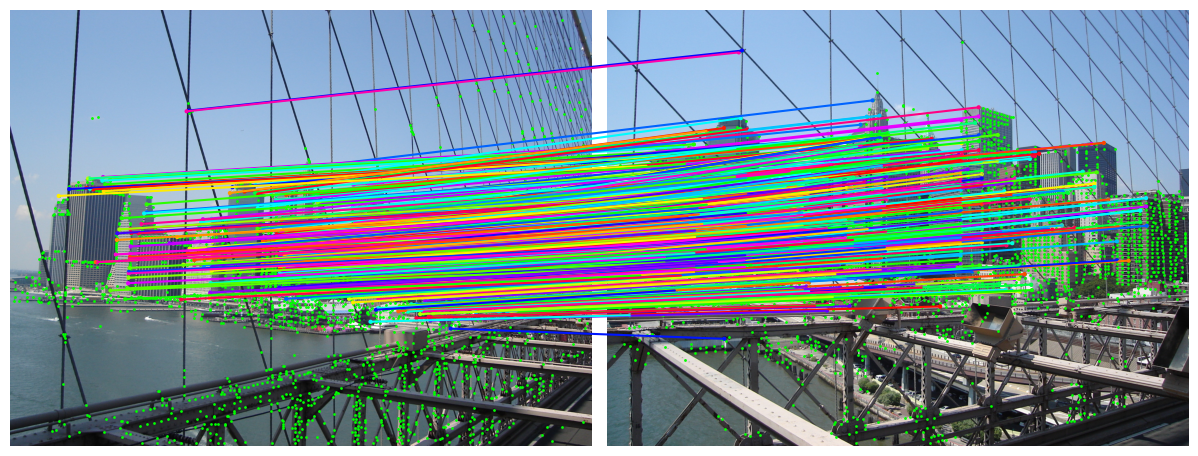

In [150]:
idx = 6
jdx = 8

image2 = model.images[idx]
image1 = model.images[jdx]

img1 = load_image(os.path.join(data_path, scene, "images", image1.name))
img2 = load_image(os.path.join(data_path, scene, "images", image2.name))


points_img1 = np.array([p.xy for p in image1.get_valid_points2D() if p.has_point3D()])
points_img2 = np.array([p.xy for p in image2.get_valid_points2D() if p.has_point3D()])

matches = []
for i, p1 in enumerate(image1.get_valid_points2D()):
    if p1.has_point3D():
        for j, p2 in enumerate(image2.get_valid_points2D()):
            if p2.has_point3D() and p1.point3D_id == p2.point3D_id:
                matches.append((i, j))
                break

matches = np.array([[points_img1[i], points_img2[j]] for i, j in matches])

plot_images([img1, img2])
plot_keypoints([points_img1, points_img2], ps=4)
plot_matches(matches[:, 0], matches[:, 1])

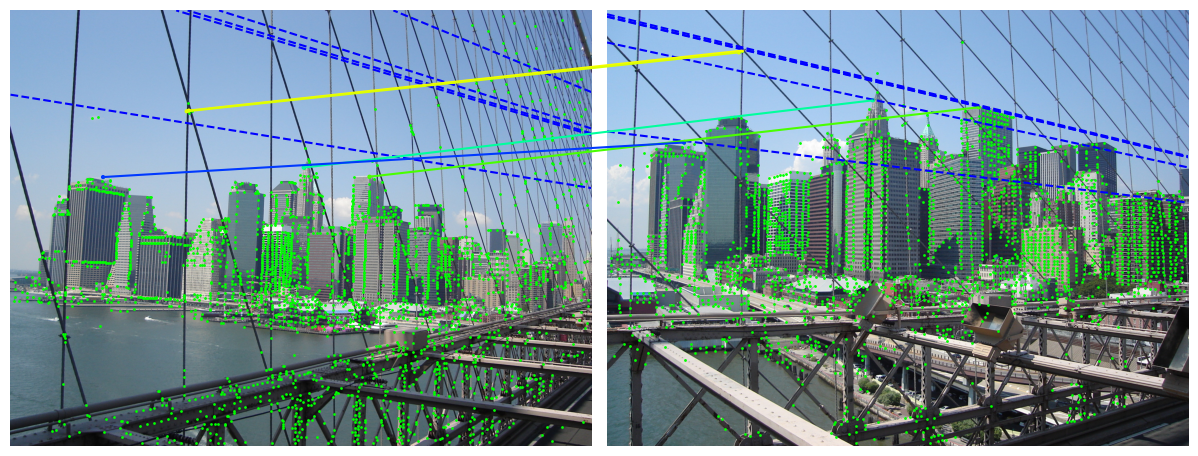

In [151]:
n = 5
idx = 8
jdx = 6

F, _ = cv2.findFundamentalMat(matches[:, 0], matches[:, 1], cv2.FM_RANSAC)

plot_images([img1, img2])
plot_keypoints([points_img1, points_img2], ps=4)
plot_matches(matches[:n, 0], matches[:n, 1])
plot_epipolar_lines(matches[:n, 0], matches[:n, 1], F)

In [2]:
help(pycolmap)

Help on module pycolmap:

NAME
    pycolmap - COLMAP plugin

CLASSES
    pybind11_builtins.pybind11_object(builtins.object)
        AbsolutePoseEstimationOptions
        AbsolutePoseRefinementOptions
        Camera
        CameraMode
        CopyType
        Correspondence
        CorrespondenceGraph
        Device
        ExhaustiveMatchingOptions
        Image
        ImageReaderOptions
        IncrementalMapperOptions
        IncrementalTriangulator
        IncrementalTriangulatorOptions
        ItemsView[MapCameraIdCamera]
        ItemsView[MapImageIdImage]
        ItemsView[MapPoint3DIdPoint3D]
        KeysView[MapCameraIdCamera]
        KeysView[MapImageIdImage]
        KeysView[MapPoint3DIdPoint3D]
        ListPoint2D
        MapCameraIdCamera
        MapImageIdImage
        MapPoint3DIdPoint3D
        Normalization
        PatchMatchOptions
        Point2D
        Point3D
        RANSACOptions
        Reconstruction
        SequentialMatchingOptions
        Sift
        SiftExt

In [ ]:
from PIL import Image

img = Image.open(os.path.join(data_path, scene, "images", image1.name))